### Build A Basic Chatbot With Langgraph(GRAPH API)

In [1]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model 
from typing import Annotated
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
import os 
from dotenv import load_dotenv 
load_dotenv()

True

In [3]:
llm= ChatGroq(model="llama3-8b-8192")

In [4]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001AB36C3D2B0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001AB36C3DE80>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
llm= init_chat_model("groq:llama3-8b-8192")

In [6]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001AB36D451D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001AB36D45BD0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
# Define State

class State(TypedDict):
    """ 
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    """
    messages: Annotated[list, add_messages]

In [8]:
# Node Functionality
def chatbot(state: State):
    # messages= state["messages"]
    # response= llm.invoke(messages)
    # return {"messages": [response]}

    return {"messages": [llm.invoke(state["messages"])]}

In [9]:
# Initialize the State Graph
graph_builder= StateGraph(State)

# Adding node
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile the graph
graph= graph_builder.compile()

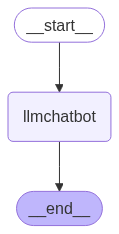

In [10]:
# Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as ex:
    pass 

In [11]:
graph.invoke({"messages": ["Hi"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='d446aeb3-c2ac-44cd-ac97-4d545e4d28ce'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.02826611, 'prompt_time': 0.002513865, 'queue_time': 0.269679434, 'total_time': 0.030779975}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--2eb314a2-f0ff-4f94-b832-d9d626f76932-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [12]:
response= graph.invoke({"messages": ["What is Agentic AI?"]})
# Print Last Messages
response["messages"][-1]

AIMessage(content='Agentic AI refers to artificial intelligence (AI) systems that are designed to exhibit autonomous decision-making, problem-solving, and goal-directed behavior, similar to human agents. These systems are capable of initiating actions, responding to situations, and adapting to new information, all while pursuing specific objectives.\n\nIn other words, agentic AI systems are designed to be proactive, rather than simply reactive. They are able to take the initiative, make decisions, and execute actions without being explicitly instructed or controlled by humans. This ability to act autonomously is often referred to as "agency" in the context of AI.\n\nSome key characteristics of agentic AI include:\n\n1. **Autonomy**: The ability to make decisions and take actions without human intervention or control.\n2. **Goal-directed behavior**: The ability to pursue specific objectives or goals, and adjust behavior accordingly.\n3. **Initiative**: The ability to take the initiative

In [13]:
# Print First Messages
response["messages"][0]

HumanMessage(content='What is Agentic AI?', additional_kwargs={}, response_metadata={}, id='69df20ab-d642-4b6e-a06b-c99c2dd2ff5b')

In [14]:
# User's Question
print(response["messages"][0].content)

What is Agentic AI?


In [15]:
# LLM's response
print(response["messages"][-1].content)

Agentic AI refers to artificial intelligence (AI) systems that are designed to exhibit autonomous decision-making, problem-solving, and goal-directed behavior, similar to human agents. These systems are capable of initiating actions, responding to situations, and adapting to new information, all while pursuing specific objectives.

In other words, agentic AI systems are designed to be proactive, rather than simply reactive. They are able to take the initiative, make decisions, and execute actions without being explicitly instructed or controlled by humans. This ability to act autonomously is often referred to as "agency" in the context of AI.

Some key characteristics of agentic AI include:

1. **Autonomy**: The ability to make decisions and take actions without human intervention or control.
2. **Goal-directed behavior**: The ability to pursue specific objectives or goals, and adjust behavior accordingly.
3. **Initiative**: The ability to take the initiative and start actions without 

In [16]:
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have emotions or feelings like humans do, so I don't have a good or bad day. However, I'm functioning properly and ready to help you with any questions or tasks you may have! How can I assist you today?


### Chatbot With Tool

In [17]:
from langchain_tavily import TavilySearch

tool= TavilySearch(max_results=2)
tool.invoke("What is Agentic AI?")

{'query': 'What is Agentic AI?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What Is Agentic AI? - IBM',
   'url': 'https://www.ibm.com/think/topics/agentic-ai',
   'content': 'What Is Agentic AI? What is agentic AI? What is agentic AI? While generative models focus on creating content based on learned patterns, agentic AI extends this capability by applying generative outputs toward specific goals. A generative AI model like OpenAI’s ChatGPT might produce text, images or code, but an agentic AI system can use that generated content to complete complex tasks autonomously by calling external tools. What are the advantages of agentic AI? How agentic AI works AI orchestration is the coordination and management of systems and agents. Examples of agentic AI Challenges for agentic AI systems Agentic AI systems have massive potential for the enterprise. Many agentic AI systems use reinforcement learning, which involves maximizing a reward function.',


In [18]:
tool.name

'tavily_search'

In [19]:
tool.args

{'query': {'description': 'Search query to look up',
  'title': 'Query',
  'type': 'string'},
 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'},
   {'type': 'null'}],
  'default': [],
  'description': 'A list of domains to restrict search results to.\n\n        Use this parameter when:\n        1. The user explicitly requests information from specific websites (e.g., "Find climate data from nasa.gov")\n        2. The user mentions an organization or company without specifying the domain (e.g., "Find information about iPhones from Apple")\n\n        In both cases, you should determine the appropriate domains (e.g., ["nasa.gov"] or ["apple.com"]) and set this parameter.\n\n        Results will ONLY come from the specified domains - no other sources will be included.\n        Default is None (no domain restriction).\n        ',
  'title': 'Include Domains'},
 'exclude_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'},
   {'type': 'null'}],
  '

In [20]:
tool.description

'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.'

In [21]:
# Custom function
def multiply(a:int, b:int) -> int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [22]:
tools= [tool, multiply]

In [23]:
llm_with_tools= llm.bind_tools(tools)

In [24]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001AB36D451D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001AB36D45BD0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

In [25]:
import operator
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from typing import List, Annotated, Sequence, TypedDict 
# from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage

In [26]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [27]:
# Node definition
def tool_calling_llm(state: AgentState):
    # messages= state["messages"]
    # response= llm_with_tools.invoke(messages)
    # return {"messages": [response]}

    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [28]:
# Grpah
builder= StateGraph(AgentState)

# Add Nodes
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", "tools")

# Add Conditional Edges
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
# Add Edge
builder.add_edge("tools", END)

# Compile the Graph
graph= builder.compile()

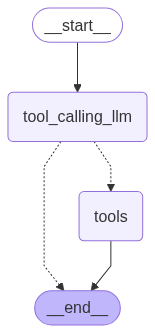

In [29]:
# Visualize the Graph
from IPython.display import display, Image

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [30]:
# Question
response["messages"][-0]

HumanMessage(content='What is Agentic AI?', additional_kwargs={}, response_metadata={}, id='69df20ab-d642-4b6e-a06b-c99c2dd2ff5b')

In [31]:
# Response from tools
response["messages"][-1]

AIMessage(content='Agentic AI refers to artificial intelligence (AI) systems that are designed to exhibit autonomous decision-making, problem-solving, and goal-directed behavior, similar to human agents. These systems are capable of initiating actions, responding to situations, and adapting to new information, all while pursuing specific objectives.\n\nIn other words, agentic AI systems are designed to be proactive, rather than simply reactive. They are able to take the initiative, make decisions, and execute actions without being explicitly instructed or controlled by humans. This ability to act autonomously is often referred to as "agency" in the context of AI.\n\nSome key characteristics of agentic AI include:\n\n1. **Autonomy**: The ability to make decisions and take actions without human intervention or control.\n2. **Goal-directed behavior**: The ability to pursue specific objectives or goals, and adjust behavior accordingly.\n3. **Initiative**: The ability to take the initiative

In [32]:
response["messages"][-1].content

'Agentic AI refers to artificial intelligence (AI) systems that are designed to exhibit autonomous decision-making, problem-solving, and goal-directed behavior, similar to human agents. These systems are capable of initiating actions, responding to situations, and adapting to new information, all while pursuing specific objectives.\n\nIn other words, agentic AI systems are designed to be proactive, rather than simply reactive. They are able to take the initiative, make decisions, and execute actions without being explicitly instructed or controlled by humans. This ability to act autonomously is often referred to as "agency" in the context of AI.\n\nSome key characteristics of agentic AI include:\n\n1. **Autonomy**: The ability to make decisions and take actions without human intervention or control.\n2. **Goal-directed behavior**: The ability to pursue specific objectives or goals, and adjust behavior accordingly.\n3. **Initiative**: The ability to take the initiative and start actions

In [33]:
state= {"messages": ["What is the recent ai news"]}
state 

{'messages': ['What is the recent ai news']}

In [34]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")


Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'saktrhbva', 'function': {'arguments': '{"exclude_domains":[],"include_domains":[],"include_images":false,"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 2194, 'total_tokens': 2306, 'completion_time': 0.128432013, 'prompt_time': 0.242734873, 'queue_time': 0.270743846, 'total_time': 0.371166886}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1b141134-c3cd-456d-ab92-14ba009359fd-0', tool_calls=[{'name': 'tavily_search', 'args': {'exclude_domains': [], 'include_domains': [], 'include_images': False, 'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': 's

In [35]:
response= graph.invoke({"messages": ["What is 5 multiplied by 2"]})
response

{'messages': ['What is 5 multiplied by 2',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '85c1h20ds', 'function': {'arguments': '{"a":5,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 2196, 'total_tokens': 2284, 'completion_time': 0.078478883, 'prompt_time': 0.241095894, 'queue_time': 0.2757743140000001, 'total_time': 0.319574777}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d9510427-cdbd-4142-9e10-42e42c9fab7c-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 2}, 'id': '85c1h20ds', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2196, 'output_tokens': 88, 'total_tokens': 2284}),
  ToolMessage(content='10', name='multiply', tool_call_id='85c1h20ds')]}

In [36]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")

Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'he5kqkjw6', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2194, 'total_tokens': 2287, 'completion_time': 0.106107886, 'prompt_time': 0.243786573, 'queue_time': 0.271554845, 'total_time': 0.349894459}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d0999696-3b89-40c2-bbfa-a31490ce3c7a-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'general'}, 'id': 'he5kqkjw6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 93, 'total_tokens': 2287})]}


Output from

In [37]:
response= graph.invoke({"messages": ["Give me the recent ai news and then multiply 5 by 10"]})
response

{'messages': ['Give me the recent ai news and then multiply 5 by 10',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '407g5va04', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}, {'id': '3zsp7amb8', 'function': {'arguments': '{"a":5,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 198, 'prompt_tokens': 2202, 'total_tokens': 2400, 'completion_time': 0.22393063, 'prompt_time': 0.244061091, 'queue_time': 0.272314727, 'total_time': 0.467991721}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e95660bd-e833-4517-ae65-800a80e7bdea-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': '407g5va04', 'type': 'tool_call'}, {'name': 'multiply', 'args': {'a': 5, 'b': 10}, 

In [38]:
response["messages"][0]

'Give me the recent ai news and then multiply 5 by 10'

In [39]:
response["messages"][-1]

ToolMessage(content='50', name='multiply', tool_call_id='3zsp7amb8')

In [40]:
state= {"messages": ["Give me the recent ai news and then multiply 5 by 10"]}
state

{'messages': ['Give me the recent ai news and then multiply 5 by 10']}

In [41]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")

Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hxzkh0m2b', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 169, 'prompt_tokens': 2202, 'total_tokens': 2371, 'completion_time': 0.155655645, 'prompt_time': 0.245798077, 'queue_time': 0.27722211100000005, 'total_time': 0.401453722}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e1add3e1-6baf-4a94-ace5-d2b192e0af0a-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': 'hxzkh0m2b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2202, 'output_tokens': 169, 'total_tokens': 2371})]}


Output 

### ReAct Agent Architecture

In [42]:
from typing import List, Annotated, TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

class State(TypedDict):
    messages: Annotated[list, add_messages]

def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}
    
graph= StateGraph(State)

graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")

graph.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

graph.add_edge("tools", "tool_calling_llm")
graph.add_edge("tool_calling_llm", END)

graph_builder= graph.compile()

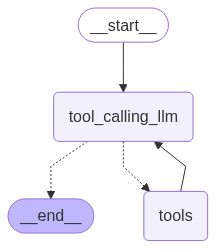

In [43]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [44]:
graph_builder.invoke({"messages": "multiply 5 and 10"})

{'messages': [HumanMessage(content='multiply 5 and 10', additional_kwargs={}, response_metadata={}, id='e0ef6b3f-081a-470e-9363-c5532572b90d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'caw417j6n', 'function': {'arguments': '{"a":5,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 2194, 'total_tokens': 2266, 'completion_time': 0.081437766, 'prompt_time': 0.319479997, 'queue_time': 0.486832038, 'total_time': 0.400917763}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e8776ca1-8dfa-4d9c-892d-8015a0a6d80c-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 10}, 'id': 'caw417j6n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 72, 'total_tokens': 2266}),
  ToolMessage(content='50', name='multiply', id='d54baef4-13d0-4f2f-8f2e-2362f520d743', tool_call_id='caw417j6n'),

In [45]:
response= graph_builder.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
response 

{'messages': [HumanMessage(content='Give me the recent ai news and then multiply 5 by 10', additional_kwargs={}, response_metadata={}, id='5e5de6f5-fece-4ae9-abf8-e739fca1708d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '641zen3kb', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day"}', 'name': 'tavily_search'}, 'type': 'function'}, {'id': '0aqf0wb9n', 'function': {'arguments': '{"a":5,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 182, 'prompt_tokens': 2202, 'total_tokens': 2384, 'completion_time': 0.163196153, 'prompt_time': 0.24362511, 'queue_time': 0.27492437700000005, 'total_time': 0.406821263}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--72f18874-a905-4364-abac-b9af12550fa6-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth'

### Adding Memory In Agentic Graph

In [46]:
from typing import List, Annotated, TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory= MemorySaver()

class State(TypedDict):
    messages: Annotated[list, add_messages]

def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}
    
graph= StateGraph(State)

graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")

graph.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

graph.add_edge("tools", "tool_calling_llm")
graph.add_edge("tool_calling_llm", END)

graph_builder= graph.compile(memory)

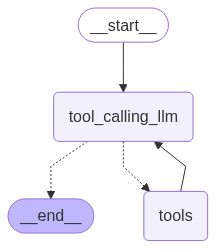

In [47]:
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [48]:
config= {"configurable": {"thread_id": "1"}}

response= graph_builder.invoke({"messages": "my name is satish"}, config=config)
response 

{'messages': [HumanMessage(content='my name is satish', additional_kwargs={}, response_metadata={}, id='86cb366a-6967-4391-be7f-acfd340f45f4'),
  AIMessage(content="Nice to meet you, Satish! I'm here to help you with your questions and tasks. What would you like to talk about or accomplish today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 2193, 'total_tokens': 2225, 'completion_time': 0.036683106, 'prompt_time': 0.244278574, 'queue_time': 0.272626104, 'total_time': 0.28096168}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--86a4e0f8-912f-47fc-bfa6-723f1b1b40e5-0', usage_metadata={'input_tokens': 2193, 'output_tokens': 32, 'total_tokens': 2225})]}

In [49]:
response["messages"][-1]

AIMessage(content="Nice to meet you, Satish! I'm here to help you with your questions and tasks. What would you like to talk about or accomplish today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 2193, 'total_tokens': 2225, 'completion_time': 0.036683106, 'prompt_time': 0.244278574, 'queue_time': 0.272626104, 'total_time': 0.28096168}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--86a4e0f8-912f-47fc-bfa6-723f1b1b40e5-0', usage_metadata={'input_tokens': 2193, 'output_tokens': 32, 'total_tokens': 2225})

In [50]:
response= graph_builder.invoke({"messages": "Hey what is my name"},config=config)
response 

{'messages': [HumanMessage(content='my name is satish', additional_kwargs={}, response_metadata={}, id='86cb366a-6967-4391-be7f-acfd340f45f4'),
  AIMessage(content="Nice to meet you, Satish! I'm here to help you with your questions and tasks. What would you like to talk about or accomplish today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 2193, 'total_tokens': 2225, 'completion_time': 0.036683106, 'prompt_time': 0.244278574, 'queue_time': 0.272626104, 'total_time': 0.28096168}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--86a4e0f8-912f-47fc-bfa6-723f1b1b40e5-0', usage_metadata={'input_tokens': 2193, 'output_tokens': 32, 'total_tokens': 2225}),
  HumanMessage(content='Hey what is my name', additional_kwargs={}, response_metadata={}, id='1cdeea1f-36e8-4154-9195-c97878422e59'),
  AIMessage(content='Your name is Satish.', additional_kwargs={}, response_me

In [51]:
print(response['messages'][-1].content)

Your name is Satish.


### Streaming

In [52]:
from langgraph.checkpoint.memory import MemorySaver
memory= MemorySaver()

In [53]:
def superbot(state:State):
    return {"messages": [llm.invoke(state['messages'])]}

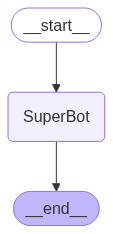

In [54]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder= graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [55]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages': "Hi,My name is Satish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Satish And I like cricket', additional_kwargs={}, response_metadata={}, id='23589ba9-f1eb-4d75-ba69-a9549a7f0e7f'),
  AIMessage(content="Hello Satish! Nice to meet you! Cricket is a great sport, isn't it? Do you have a favorite team or player? Have you ever been to a live cricket match?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 21, 'total_tokens': 60, 'completion_time': 0.044018986, 'prompt_time': 0.007168027, 'queue_time': 0.415301314, 'total_time': 0.051187013}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e14fb2c-7e44-425a-a4cb-2447c1eed250-0', usage_metadata={'input_tokens': 21, 'output_tokens': 39, 'total_tokens': 60})]}

### Streaming

Methods: stream() and astream() <br>
- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state
- **values :** This streams the full state of the graph after each node is called.
- **updates :** This streams updates to the state of the graph after each node is called.

In [56]:
# Create a thread
config= {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages': "Hi,My name is Satish And I like cricket"}, config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hello Satish! Nice to meet you! Cricket is a fantastic sport, isn't it? Do you have a favorite team or player? And do you play cricket yourself or are you more of a fan?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 21, 'total_tokens': 64, 'completion_time': 0.038494276, 'prompt_time': 0.005457857, 'queue_time': 0.333052054, 'total_time': 0.043952133}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--c449554d-c870-413e-bb13-3b9dd347b425-0', usage_metadata={'input_tokens': 21, 'output_tokens': 43, 'total_tokens': 64})]}}


In [57]:
for chunk in graph_builder.stream({'messages': "Hi,My name is Satish And I like cricket"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Satish And I like cricket', additional_kwargs={}, response_metadata={}, id='d3230e48-edf6-49f0-b35f-c06868670e73'), AIMessage(content="Hello Satish! Nice to meet you! Cricket is a fantastic sport, isn't it? Do you have a favorite team or player? And do you play cricket yourself or are you more of a fan?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 21, 'total_tokens': 64, 'completion_time': 0.038494276, 'prompt_time': 0.005457857, 'queue_time': 0.333052054, 'total_time': 0.043952133}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--c449554d-c870-413e-bb13-3b9dd347b425-0', usage_metadata={'input_tokens': 21, 'output_tokens': 43, 'total_tokens': 64}), HumanMessage(content='Hi,My name is Satish And I like cricket', additional_kwargs={}, response_metadata={}, id='1a2a1d51-fbc0-4558-afe9-627faf5c4073')]}
{'messag

In [59]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

for chunk in graph_builder.stream({'messages': "Hi,My name is Satish And I like cricket"}, config, stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Satish! Cricket is a fantastic sport, isn't it? Do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 69, 'total_tokens': 97, 'completion_time': 0.025923989, 'prompt_time': 0.009224413, 'queue_time': 0.275611945, 'total_time': 0.035148402}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--9fbaff61-a215-4b12-8375-75a65013da71-0', usage_metadata={'input_tokens': 69, 'output_tokens': 28, 'total_tokens': 97})]}}


In [60]:
for chunk in graph_builder.stream({'messages': "I also like football"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Satish And I like cricket', additional_kwargs={}, response_metadata={}, id='83b4f6df-c676-4a40-b5ef-4e29f9f814aa'), AIMessage(content="Nice to meet you, Satish! Cricket is a fantastic sport, isn't it? Do you have a favorite team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 21, 'total_tokens': 49, 'completion_time': 0.040196216, 'prompt_time': 0.012771219, 'queue_time': 0.510418419, 'total_time': 0.052967435}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--a24c2ece-8ad6-4d6f-a3fd-7b1e9b675793-0', usage_metadata={'input_tokens': 21, 'output_tokens': 28, 'total_tokens': 49}), HumanMessage(content='Hi,My name is Satish And I like cricket', additional_kwargs={}, response_metadata={}, id='9f99fe46-358f-4317-9f8c-0b0b63d2a306'), AIMessage(content="Nice to meet you, Satish! Cricket is a fantastic sport,

In [61]:
config = {"configurable": {"thread_id": "5"}}

async for event in graph_builder.astream_events({"messages": ["Hi My name is Krish and I like to play cricket"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'b732efc4-b5f1-43bc-8c62-dee9f5cd1fd6', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Krish and I like to play cricket', additional_kwargs={}, response_metadata={}, id='6099e853-952f-472a-9de8-98e8400cf736')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '9843c99a-568c-40cc-b37d-04eed1f7f8b0', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:09977586-9d7a-bd70-552c-21dcc9564447'}, 'parent_ids': ['b732efc4-b5f1-43bc-8c62-dee9f5cd1fd6']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My name is Krish and I like to pla